# Pie Chart
---
Pie Chart adalah grafik _circular_ yang menampilkan proporsi numerik dengan membagi lingkaran (atau _pie_) menjadi irisan proporsional.

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
london_crime = pd.read_csv("london_crime_by_lsoa.csv")

### Dengan menggunakan Pie Chart, kita dapat memperoleh informasi sebagai berikut:

---
#### Question: Bagaimana proporsi kategori kejahatan/kriminal di London dari tahun 2008-2016?

Sebelumnya, menggunakan [Area Plot]() dan [Bar Chart]() telah diketahui bahwa Theft and Handling adalah kategori kejahatan/kriminal yang paling dominan di London selama tahun 2008-2016. Menggunakan Pie Chart, kita dapat mengetahui bagaimana proporsi masing-masing kategori kejahatan/kriminal di London.

In [3]:
crime_proportion = london_crime.drop(["borough","lsoa_code","minor_category","year","month"], axis=1)
crime_proportion = crime_proportion.groupby("major_category").size()
crime_proportion

major_category
Burglary                       1043604
Criminal Damage                2069172
Drugs                          1179468
Fraud or Forgery                236520
Other Notifiable Offences       776304
Robbery                         939384
Sexual Offences                 108108
Theft and Handling             3966300
Violence Against the Person    3171744
dtype: int64

_Output_ di atas adalah masing-masing proporsi kategori kejahatan/kriminal di London tahun 2008-2016.

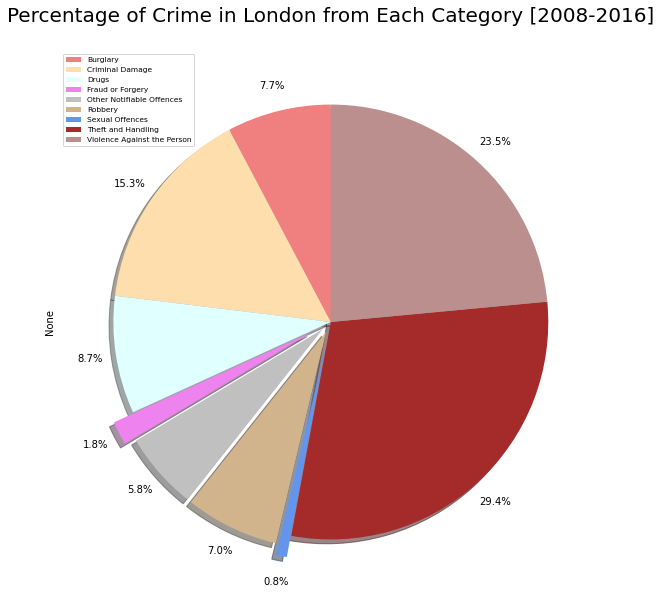

In [4]:
explode_list = [0,0,0,0.1,0.05,0.05,0.1,0,0]
color_list = ["lightcoral","navajowhite","lightcyan","violet","silver",
             "tan","cornflowerblue","brown","rosybrown"]
crime_proportion.plot(kind="pie",
                     figsize=(20,10),
                     autopct="%1.1f%%",
                     startangle=90,
                     shadow=True,
                     labels=None,
                     pctdistance=1.12,
                     explode = explode_list,
                     colors=color_list)
plt.title("Percentage of Crime in London from Each Category [2008-2016]\n", fontsize=20, loc="center")
plt.legend(labels=crime_proportion.index, loc="upper left", prop={"size":7.5})
plt.show()

Berikut adalah proporsi kategori kejahatan/kriminal di London selama tahun 2008-2016 dalam satuan persen. Persentase tertinggi adalah kategori Theft and Handling yaitu sebesar 29.4% dan Violance Against the Person sebesar 23.5%. Sedangkan Sexual Offences dan Fraud or Forgery sebagai kategori dengan jumlah kasus terendah memiliki persentase sebesar 0.8% dan 1.8%.

---
#### Question: Bagaimana proporsi kategori kejahatan/kriminal di wilayah metropolis tertentu (misal Redbridge) dari tahun 2008-2016?

Dengan menggunakan Pie Chart, kita juga bisa mengetahui bagaimana proporsi kategori kejahatan/kriminal di wilayah metropolitan tertentu, misalnya kita ingin mengetahui bagaimana proporsi masing-masing kategori kejahatan/kriminal di Regbridge dari tahun 2008-2016.

In [7]:
redbridge_crime_proportion = london_crime.drop(["lsoa_code","minor_category","year","month"], axis=1).set_index("borough")
redbridge_crime_proportion = redbridge_crime_proportion.loc["Redbridge"]
redbridge_crime_proportion = redbridge_crime_proportion.groupby("major_category").size()
redbridge_crime_proportion

major_category
Burglary                        34776
Criminal Damage                 68796
Drugs                           36504
Fraud or Forgery                 8532
Other Notifiable Offences       24840
Robbery                         32400
Sexual Offences                  2808
Theft and Handling             131760
Violence Against the Person    105300
dtype: int64

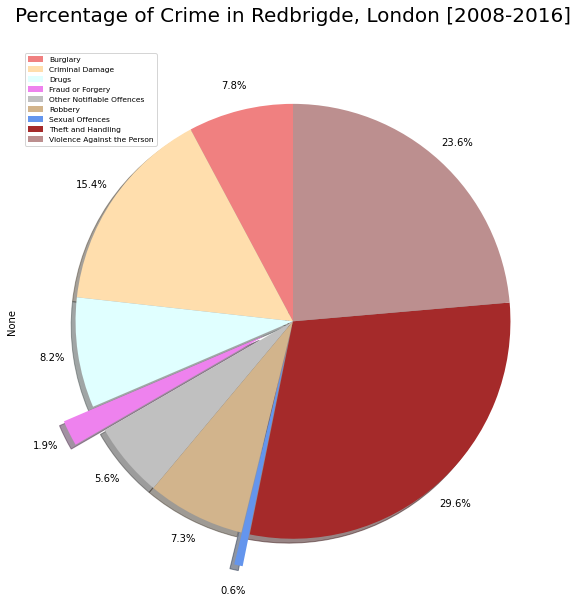

In [11]:
explode_list = [0,0,0,0.15,0,0,0.15,0,0]
color_list = ["lightcoral","navajowhite","lightcyan","violet","silver",
             "tan","cornflowerblue","brown","rosybrown"]
redbridge_crime_proportion.plot(kind="pie",
                     figsize=(20,10),
                     autopct="%1.1f%%",
                     startangle=90,
                     shadow=True,
                     labels=None,
                     pctdistance=1.12,
                     colors=color_list,
                    explode = explode_list,
                               subplots=True)
plt.title("Percentage of Crime in Redbrigde, London [2008-2016]\n", fontsize=20, loc="center")
plt.legend(labels=redbridge_crime_proportion.index, loc="upper left", prop={"size":7.5})
plt.show()

Berdasarkan grafik di atas, diketahui bahwa persentase tertinggi kategori kejahatan/kriminal di Redbridge tahun 2008-2016 adalah Theft and Handling yaitu sebesar 29.6% dan persentase terendah adalah Sexual Offences 0.6%. Misal kita ingin mengetahui juga bagaimana proporsi kejahatan di wilayah City of London, yaitu sebagai berikut:

In [12]:
city_crime_proportion = london_crime.drop(["lsoa_code","minor_category","year","month"], axis=1).set_index("borough")
city_crime_proportion = city_crime_proportion.loc["City of London"]
city_crime_proportion = city_crime_proportion.groupby("major_category").size()
city_crime_proportion

major_category
Burglary                        540
Criminal Damage                1188
Drugs                           756
Other Notifiable Offences       432
Robbery                         540
Theft and Handling             3564
Violence Against the Person    2700
dtype: int64

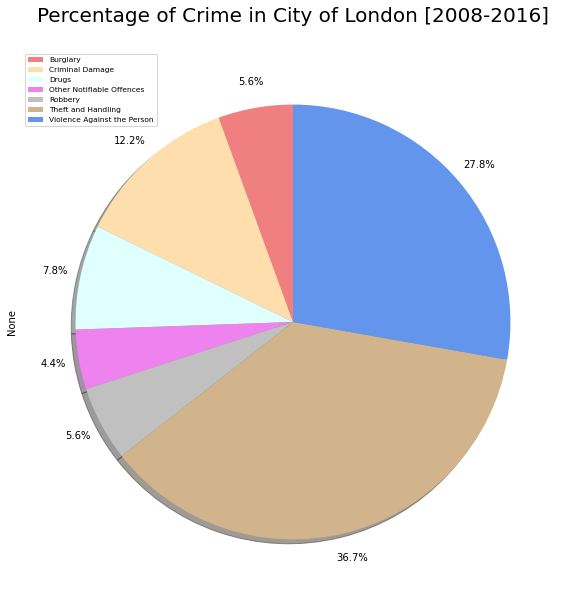

In [15]:
color_list = ["lightcoral","navajowhite","lightcyan","violet","silver",
             "tan","cornflowerblue","brown","rosybrown"]
city_crime_proportion.plot(kind="pie",
                     figsize=(20,10),
                     autopct="%1.1f%%",
                     startangle=90,
                     shadow=True,
                     labels=None,
                     pctdistance=1.12,
                     colors=color_list,
                               subplots=True)
plt.title("Percentage of Crime in City of London [2008-2016]\n", fontsize=20, loc="center")
plt.legend(labels=city_crime_proportion.index, loc="upper left", prop={"size":7.5})
plt.show()

Diketahui bahwa di wilayah City of London tidak terdapat kasus Sexual Offences dan Fraud or Forgery sehingga tidak disertakan di Pie Chart. Selain itu, persentase kejahatan/kriminal di London yang tertinggi masih tetap Theft and Handling yaitu sebesar 36.7%. Dengan Pie Chart, kita dapat mengetahui proporsi atau persentase kategori kriminal/kejahatan di semua wilayah metropolitan London selama 2008-2016.

---
#### Question: Untuk lebih spesifik lagi, bagaimana proporsi kategori kejahatan/kriminal di wilayah tertentu pada tahun tertentu (misal proporsi kategori kejahatan/kriminal di Sutton pada tahun 2010)

Kita bisa memperoleh informasi terkait tentang kategori kejahatan/kriminal apa yang paling dominan di wilayah tertentu pada tahun tertentu, dalam kasus ini di Sutton pada tahun 2010 menggunakan Bar Chart. Hasil yang direpresentasikan Bar Chart adalah jumlah dalam bentuk batang. Dengan menggunakan Pie Chart, kita juga bisa mengetahui tentang kategori kejahatan/kriminal apa yang paling dominan di Sutton tahun 2010 dalam bentuk proporsi atau persentase.

In [25]:
borough_crime_proportion = london_crime.drop(["lsoa_code","minor_category","month"], axis=1).set_index("year")
borough_crime_proportion = borough_crime_proportion.loc[2010]
borough_crime_proportion= pd.pivot_table(borough_crime_proportion, values="value", aggfunc=np.size, index="borough", columns="major_category")
borough_crime_proportion = borough_crime_proportion.loc["Sutton"].transpose()
borough_crime_proportion

major_category
Burglary                        2904.0
Criminal Damage                 5712.0
Drugs                           2976.0
Fraud or Forgery                 336.0
Other Notifiable Offences       1968.0
Robbery                         2340.0
Sexual Offences                  204.0
Theft and Handling             10752.0
Violence Against the Person     8640.0
Name: Sutton, dtype: float64

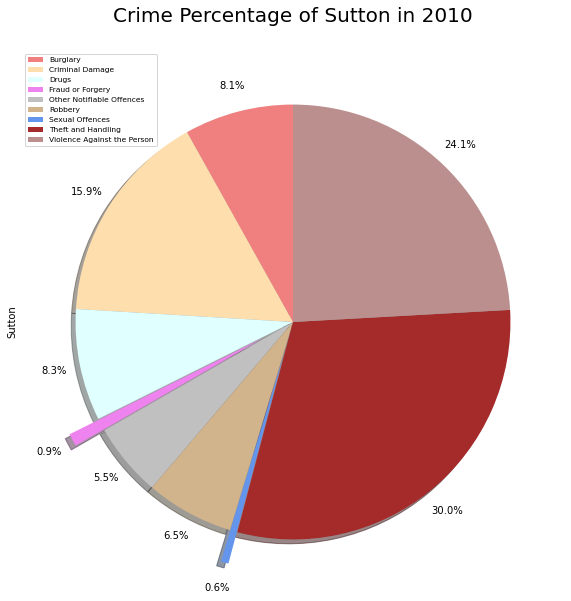

In [27]:
explode_list = [0, 0, 0, 0.15, 0, 0, 0.15, 0, 0]
color_list = ["lightcoral","navajowhite","lightcyan","violet","silver",
             "tan","cornflowerblue","brown","rosybrown"]
borough_crime_proportion.plot(kind="pie",
                              figsize=(20, 10),
                              autopct="%1.1f%%",
                              startangle=90,
                              labels=None,
                              pctdistance=1.12,
                              explode=explode_list,
                              subplots=True,
                             shadow=True,
                             colors=color_list)
plt.title(
    "Crime Percentage of Sutton in 2010\n", fontsize=20, loc="center")
plt.legend(labels=borough_crime_proportion.index,
           loc="upper left", prop={"size": 7.5})
plt.show()

Diketahui bahwa Theft and Handling juga merupakan kategori kejahatan/kriminal yang paling tinggi di Sutton pada tahun 2010. 

Selain dengan Bar Chart, kita juga dapat mengetahui informasi mengenai kategori kejahatan/kriminal di wilayah tertentu pada tahun tertentu, hanya berbeda bentuk representasinya, sehingga kita bisa menggunakan kedua visualisasi ini.

### Selain dari informasi yang sudah dilampirkan sebelumnya, dengan menggunakan Pie Chart juga dapat memperoleh informasi tentang proporsi variabel tertentu yang lebih spesifik lagi, seperti:
1. Bagaimana proporsi kategori/kejahatan tertentu di bulan tertentu/rentang waktu tertentu pada tahun tertentu (misal bagaimana proporsi kategori kejahatan/kriminal di bulan Januari-April (_1st quarter_) tahun 2016), dst.

# Conclusions

Dengan menggunakan Pie Chart kita dapat menyimpulkan beberapa informasi dari kumpulan data London Crime, 2008-2016, yaitu:

Theft and Handling memiliki proporsi tertinggi kategori kejahatan/kriminal di London dan Sexual Offences adalah proporsi terendah. Selain dengan Pie Chart, juga dapat dipastikan menggunakan Bar Chart untuk merepresentasikan jumlahnya.